In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
len(set(y_train))
#there are total 10 labels in the dataset.. 0 to 9

10

5


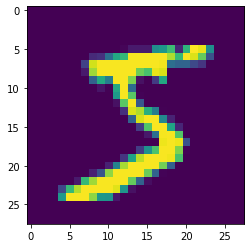

In [5]:
# for eg, the image present in the 0th index of the x_train is an image of digit '5', and its label is also mentioned as 
# - 5 in the y_train[0]
plt.imshow(x_train[0])
print(y_train[0])

In [8]:
np.set_printoptions(linewidth=200)
print(x_train[5])
print(y_train[5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100 122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252 252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211 252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 216  31  37 252 25

In [7]:
#normalisation
x_train = x_train/255.0
y_train = y_train/255.0

In [13]:

class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy')>0.09:
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True
            

In [14]:
# building the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation = tf.nn.relu),
    tf.keras.layers.Dense(10,activation = tf.nn.softmax)])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#object of MyCallback
callbacks = MyCallback()

#fitting the model
model.fit(x_train,y_train, epochs=10, callbacks=[callbacks])


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0028 - accuracy: 0.0987

Reached 99% accuracy so cancelling training!


In [10]:
#